# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [172]:
import pandas as pd
import numpy as np
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [173]:
# Membaca dataset pelanggan mall dari URL dan menampilkan 5 baris pertama
df = pd.read_csv('/content/bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [175]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [176]:
df.select_dtypes(include=[object]).value_counts()

,,,,,,,,,,,count
TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate,
TX002496,AC00182,2023-04-03 16:07:53,Credit,Louisville,D000052,4.105.134.118,M056,ATM,Doctor,2024-11-04 08:06:52,1
TX002495,AC00322,2023-03-10 17:38:58,Debit,Albuquerque,D000295,38.210.156.148,M013,Online,Doctor,2024-11-04 08:07:44,1
TX002494,AC00279,2023-03-17 16:10:35,Debit,New York,D000673,191.25.177.160,M088,Branch,Engineer,2024-11-04 08:09:52,1
TX002493,AC00057,2023-01-30 17:05:46,Debit,Albuquerque,D000497,170.225.23.251,M002,ATM,Student,2024-11-04 08:09:32,1
TX002492,AC00493,2023-04-03 16:05:30,Debit,Boston,D000353,72.192.101.196,M059,ATM,Doctor,2024-11-04 08:10:12,1
...,...,...,...,...,...,...,...,...,...,...,...
TX000005,AC00411,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student,2024-11-04 08:06:39,1
TX000004,AC00070,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student,2024-11-04 08:09:06,1
TX000003,AC00019,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student,2024-11-04 08:07:04,1


In [177]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [178]:
# Hapus kolom
data = df.drop(columns={'TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate'})

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
data.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40


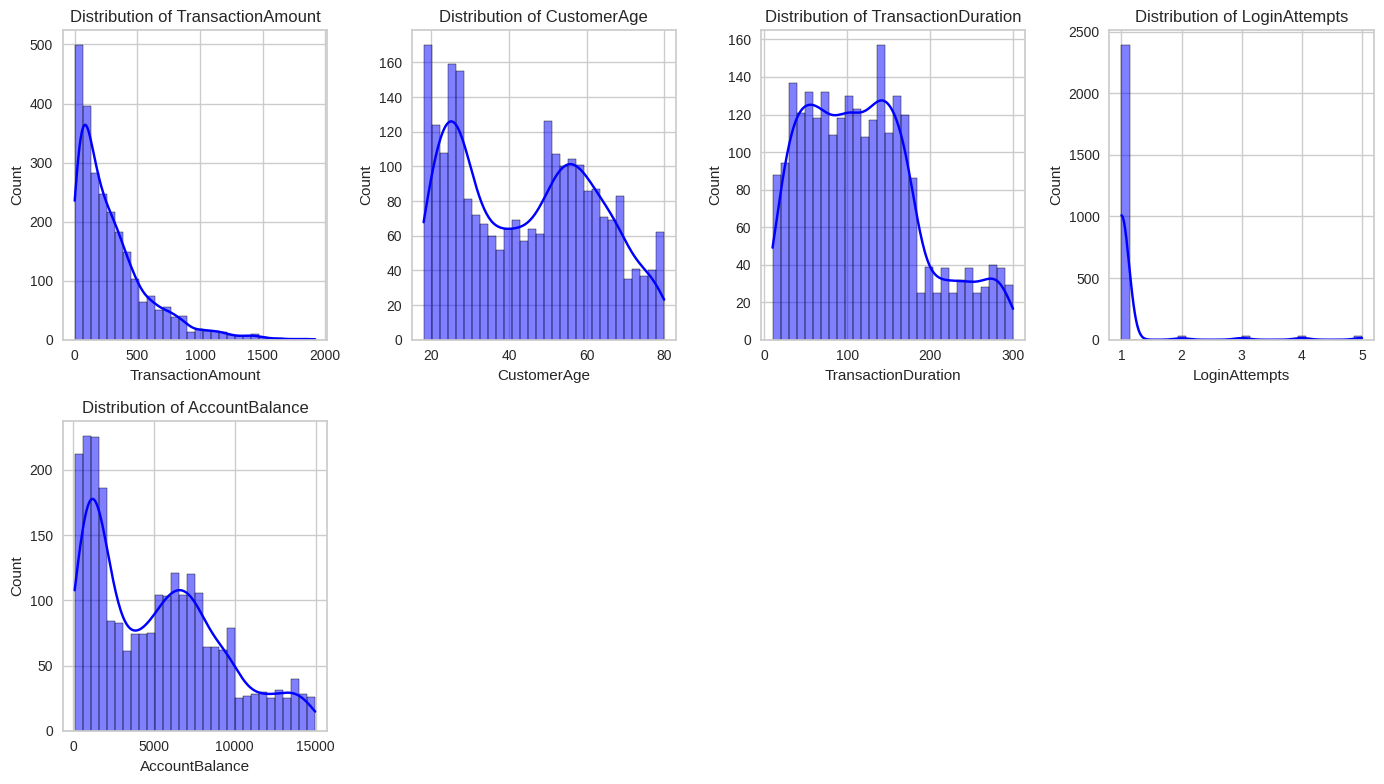

In [179]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number])
n_cols = len(num_features.columns)
n_rows = (n_cols + 3) // 4  # Hitung baris yang dibutuhkan
plt.figure(figsize=(14, n_rows * 4))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(n_rows, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Skewness fitur numerik:
TransactionAmount      1.740107
CustomerAge            0.147864
TransactionDuration    0.599432
LoginAttempts          5.173491
AccountBalance         0.601201
dtype: float64


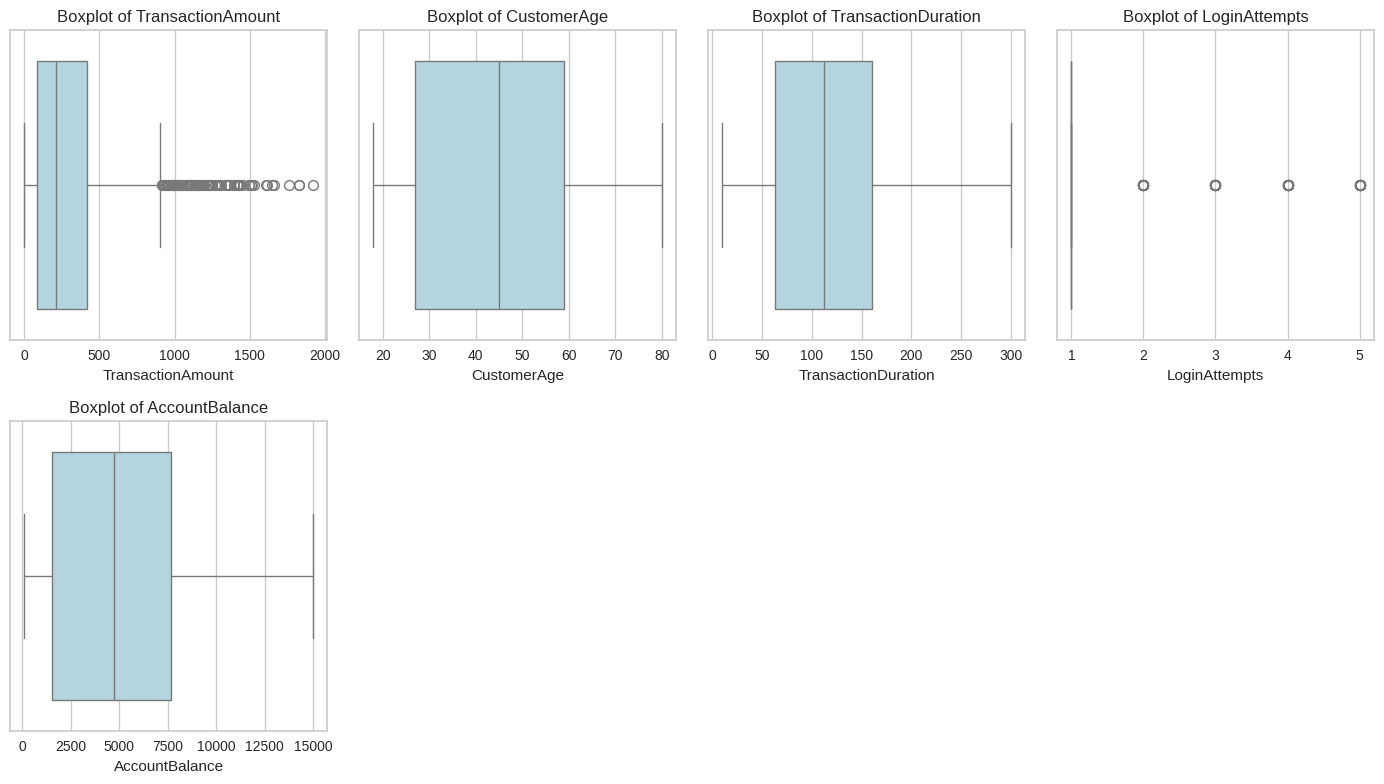

In [180]:
# Cek skewness
print("Skewness fitur numerik:")
print(num_features.skew())

# Visualisasi outliers dengan boxplot
plt.figure(figsize=(14, n_rows * 4))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(n_rows, 4, i)
    sns.boxplot(x=data[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

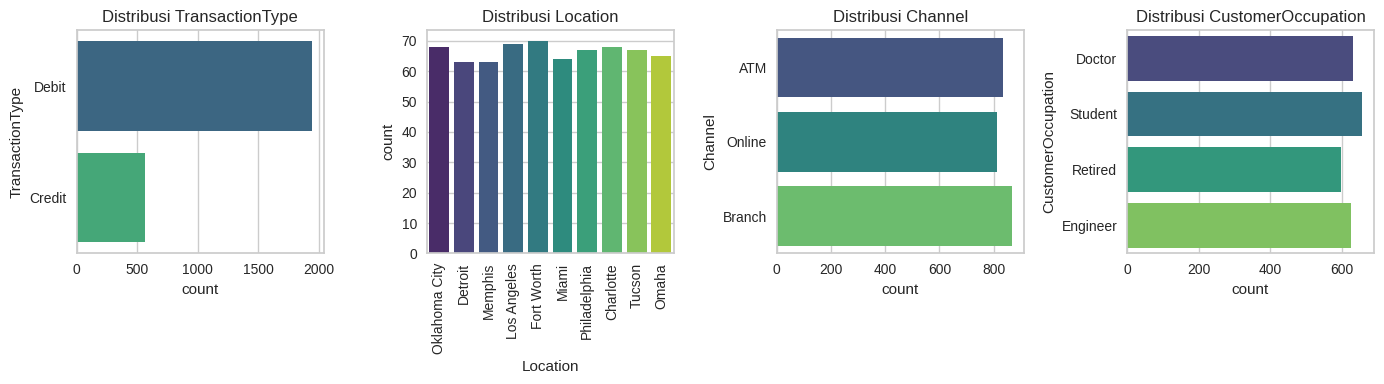

In [181]:
# Distribusi fitur kategorikal
cath_features = data.select_dtypes(include=[object])
n_cols = len(cath_features.columns)
n_rows = (n_cols + 3) // 4
plt.figure(figsize=(14, n_rows * 4))
for i, column in enumerate(cath_features.columns, 1):
    plt.subplot(n_rows, 4, i)
    if column == 'Location':
        # Ambil 10 lokasi teratas untuk menghindari label yang menumpuk
        top_categories = data[column].value_counts().index[:10]
        df_filtered = data[data[column].isin(top_categories)]
        sns.countplot(x=df_filtered[column], hue=df_filtered[column], palette='viridis', legend=False)
        plt.xticks(rotation=90)
    else:
        sns.countplot(y=data[column], hue=data[column], palette='viridis', legend=False)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [182]:
# Cek distribusi kategori untuk melihat apakah ada ketidakseimbangan
for column in cath_features.columns:
    print(f"\nProporsi kategori di {column}:")
    print(data[column].value_counts(normalize=True))


Proporsi kategori di TransactionType:
TransactionType
Debit     0.773885
Credit    0.226115
Name: proportion, dtype: float64

Proporsi kategori di Location:
Location
Fort Worth          0.027866
Los Angeles         0.027468
Oklahoma City       0.027070
Charlotte           0.027070
Philadelphia        0.026672
Tucson              0.026672
Omaha               0.025876
Miami               0.025478
Memphis             0.025080
Detroit             0.025080
Houston             0.025080
Denver              0.024682
Kansas City         0.024283
Boston              0.024283
Seattle             0.024283
Mesa                0.024283
Atlanta             0.024283
Fresno              0.023885
Chicago             0.023885
Colorado Springs    0.023885
Jacksonville        0.023885
San Jose            0.023487
Raleigh             0.023487
San Diego           0.023487
San Antonio         0.023487
Austin              0.023487
Indianapolis        0.023089
New York            0.023089
San Francisco       0

In [183]:
print(data['TransactionType'].unique())
print(data['Location'].unique())
print(data['Channel'].unique())
print(data['CustomerOccupation'].unique())

['Debit' 'Credit']
['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']
['ATM' 'Online' 'Branch']
['Doctor' 'Student' 'Retired' 'Engineer']


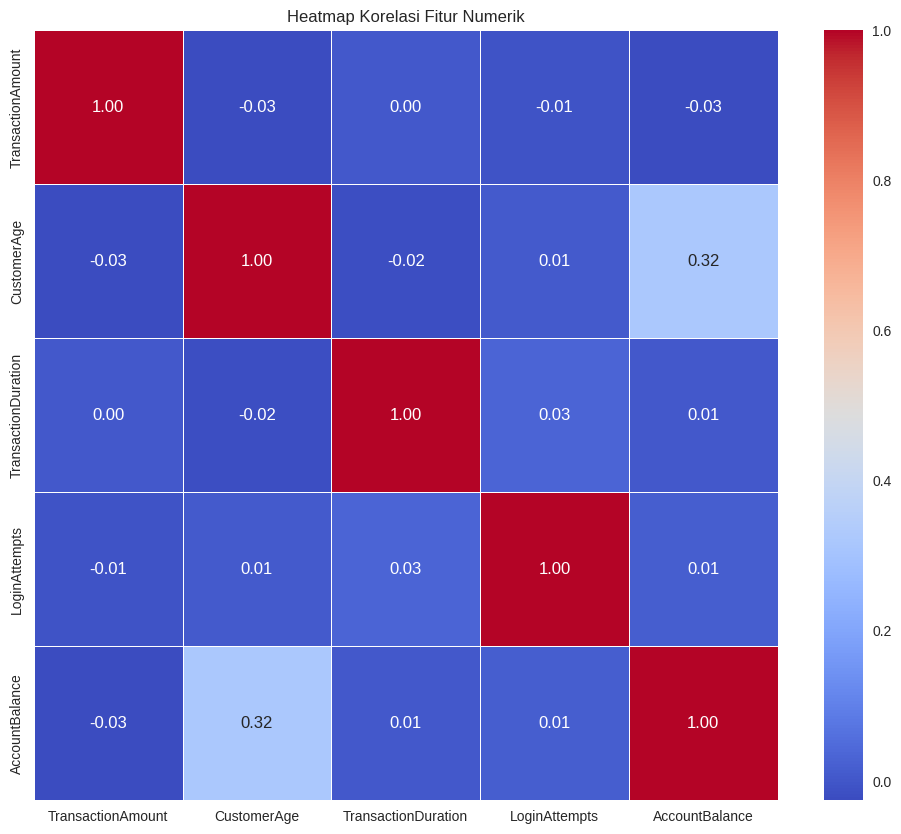

In [184]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

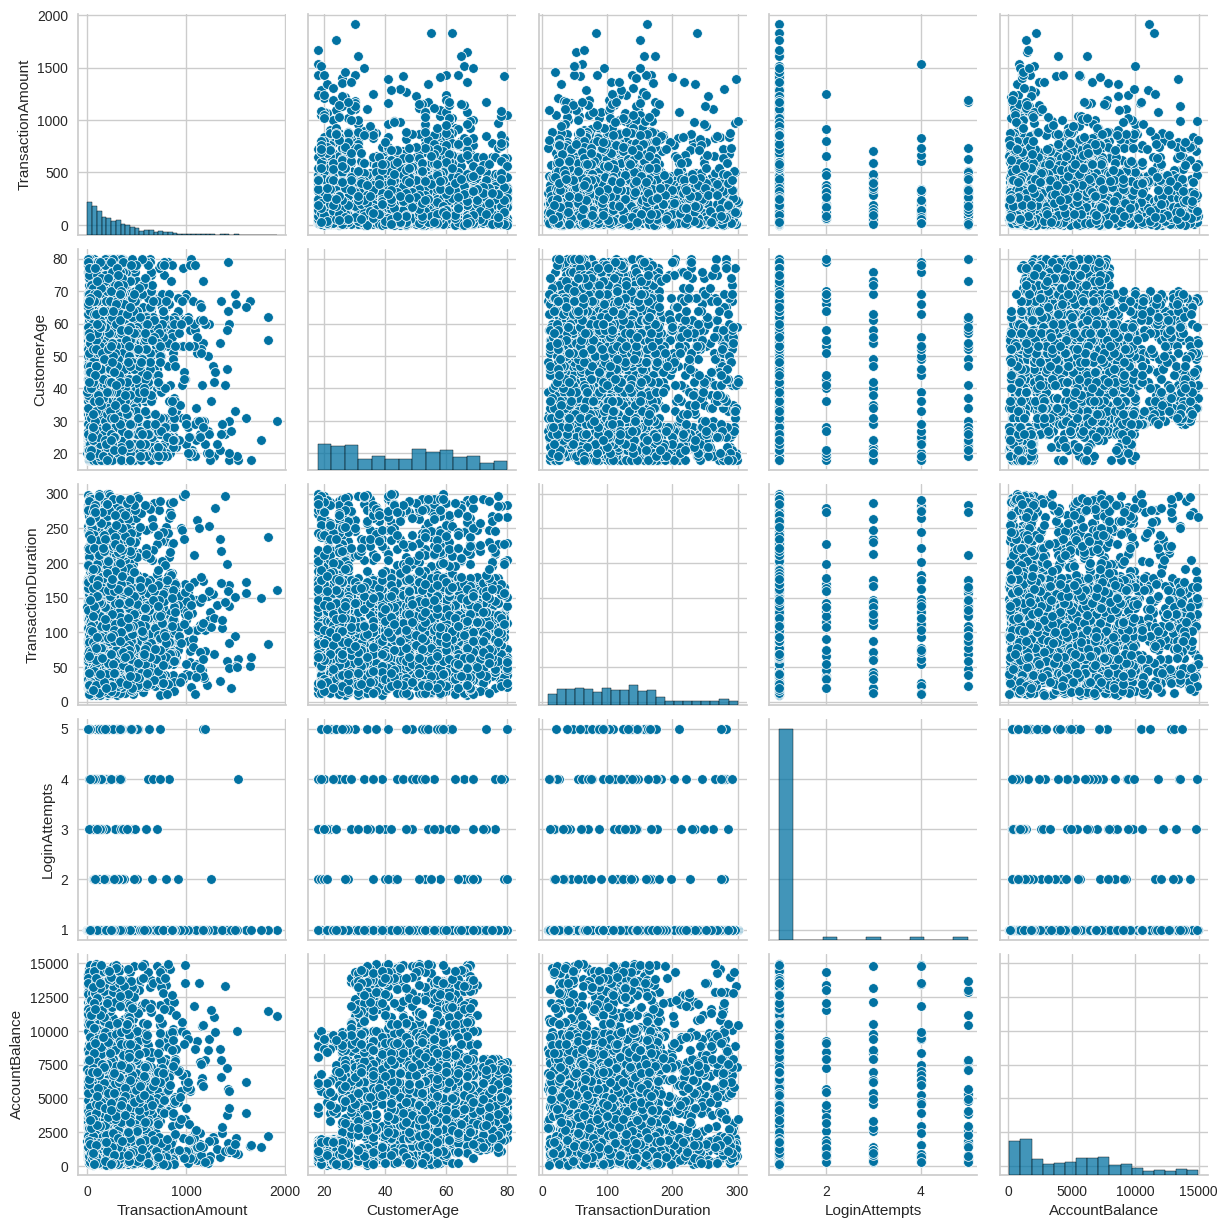

In [185]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

In [186]:
print(f"Jumlah baris dataset setelah drop: {data.shape[0]}")

Jumlah baris dataset setelah drop: 2512


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Transformation

In [187]:
data['TransactionAmount'] = np.log1p(data['TransactionAmount'])

In [188]:
data['LoginAttempts'] = np.sqrt(data['LoginAttempts'])

# Encoding

In [189]:
# One-Hot Encoding untuk TransactionType
data_encoding = data.copy()
data_encoding = pd.get_dummies(data, columns=['TransactionType', 'Channel', 'CustomerOccupation'], drop_first=False)

In [190]:
# Frequency Encoding untuk Location
location_freq = data_encoding['Location'].value_counts(normalize=True)  # Proporsi
data_encoding['Location'] = data_encoding['Location'].map(location_freq)
print("\nData setelah Frequency Encoding untuk Location:")
data_encoding.head()


Data setelah Frequency Encoding untuk Location:


,TransactionAmount,Location,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,2.714032,0.023487,70,81,1.0,5112.21,False,True,True,False,False,True,False,False,False
1,5.932882,0.025080,68,141,1.0,13758.91,False,True,True,False,False,True,False,False,False
2,4.846468,0.024283,19,56,1.0,1122.35,False,True,False,False,True,False,False,False,True
3,5.223055,0.023487,26,25,1.0,8569.06,False,True,False,False,True,False,False,False,True
4,2.670694,0.024283,26,198,1.0,7429.40,True,False,False,False,True,False,False,False,True


In [191]:
data_encoding.head()

,TransactionAmount,Location,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,2.714032,0.023487,70,81,1.0,5112.21,False,True,True,False,False,True,False,False,False
1,5.932882,0.025080,68,141,1.0,13758.91,False,True,True,False,False,True,False,False,False
2,4.846468,0.024283,19,56,1.0,1122.35,False,True,False,False,True,False,False,False,True
3,5.223055,0.023487,26,25,1.0,8569.06,False,True,False,False,True,False,False,False,True
4,2.670694,0.024283,26,198,1.0,7429.40,True,False,False,False,True,False,False,False,True


In [192]:
data_clean = data_encoding.copy()

# Binning

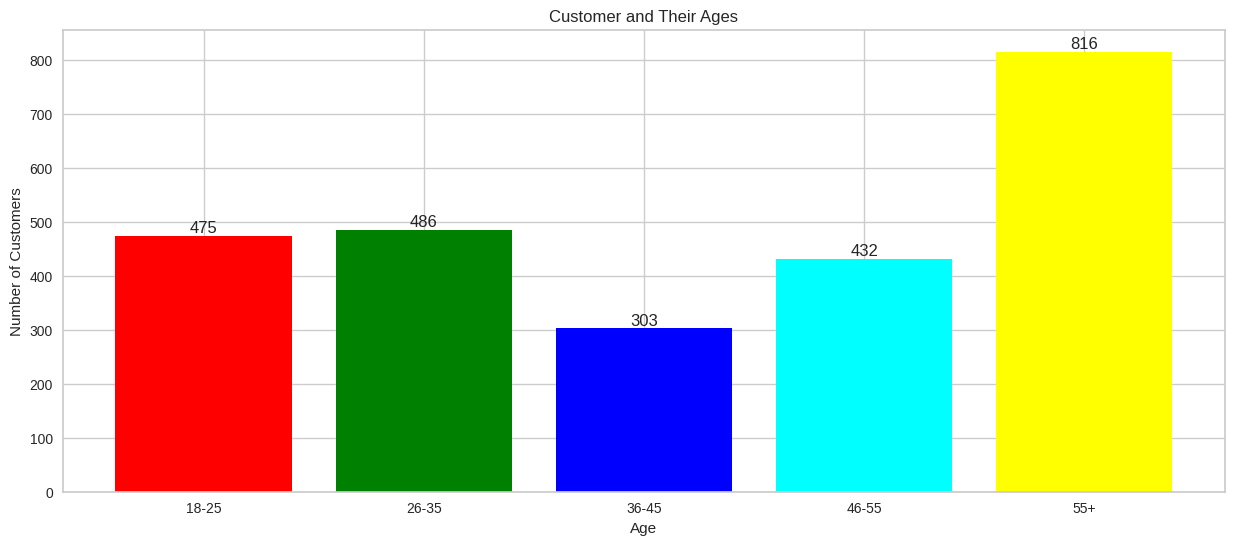

In [193]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_25 = data_clean.CustomerAge[(data_clean.CustomerAge >= 18) & (data_clean.CustomerAge <= 25)]
age26_35 = data_clean.CustomerAge[(data_clean.CustomerAge >= 26) & (data_clean.CustomerAge <= 35)]
age36_45 = data_clean.CustomerAge[(data_clean.CustomerAge >= 36) & (data_clean.CustomerAge <= 45)]
age46_55 = data_clean.CustomerAge[(data_clean.CustomerAge >= 46) & (data_clean.CustomerAge <= 55)]
age55above = data_clean.CustomerAge[data_clean.CustomerAge >= 56]

# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

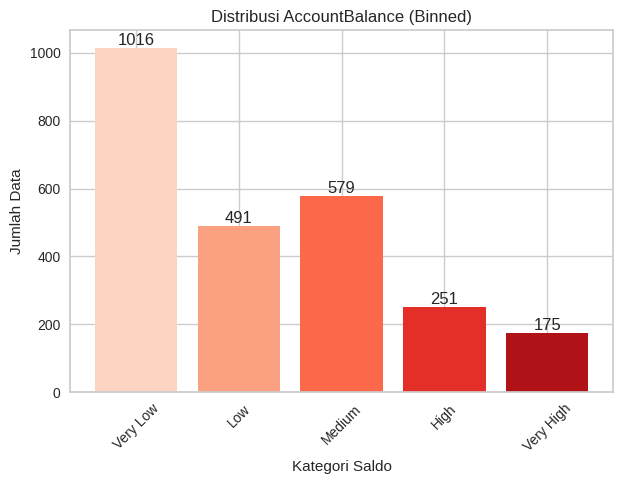

In [194]:
# Custom Binning untuk AccountBalance (5 bin)
bins = [101.25, 3076.60, 6051.95, 9027.30, 12002.65, 14977.99]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Buat variabel untuk masing-masing kategori
very_low = data_clean['AccountBalance'][(data_clean['AccountBalance'] >= bins[0]) & (data_clean['AccountBalance'] <= bins[1])]
low = data_clean['AccountBalance'][(data_clean['AccountBalance'] > bins[1]) & (data_clean['AccountBalance'] <= bins[2])]
medium = data_clean['AccountBalance'][(data_clean['AccountBalance'] > bins[2]) & (data_clean['AccountBalance'] <= bins[3])]
high = data_clean['AccountBalance'][(data_clean['AccountBalance'] > bins[3]) & (data_clean['AccountBalance'] <= bins[4])]
very_high = data_clean['AccountBalance'][(data_clean['AccountBalance'] > bins[4]) & (data_clean['AccountBalance'] <= bins[5])]

# Hitung jumlah data di setiap kategori
categories = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
counts = [len(very_low), len(low), len(medium), len(high), len(very_high)]

# Buat visualisasi
plt.figure(figsize=(12, 5))

# Bar Plot untuk distribusi AccountBalance
plt.subplot(1, 2, 1)
bars = plt.bar(categories, counts, color=sns.color_palette('Reds', 5))
plt.title('Distribusi AccountBalance (Binned)')
plt.xlabel('Kategori Saldo')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)

# Tambahkan label jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

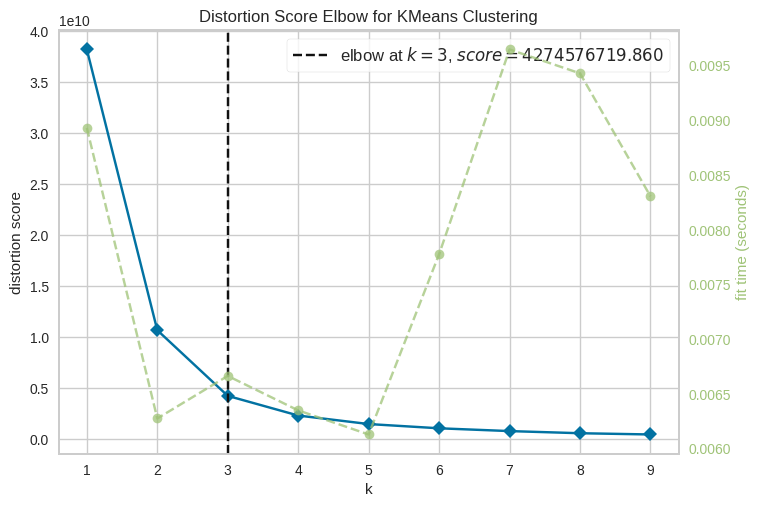

Jumlah cluster optimal (tanpa normalisasi): 3


In [195]:
features_clust = ['Location', 'TransactionType_Credit', 'TransactionType_Debit',
                  'Channel_ATM', 'Channel_Branch', 'Channel_Online',
                  'CustomerOccupation_Doctor', 'CustomerOccupation_Engineer',
                  'CustomerOccupation_Retired', 'CustomerOccupation_Student',
                  'TransactionAmount', 'CustomerAge', 'TransactionDuration',
                  'LoginAttempts', 'AccountBalance']
X_clust = data_clean[features_clust]
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_clust)
visualizer.show()

# Ambil jumlah cluster optimal
k_optimal = visualizer.elbow_value_
print(f"Jumlah cluster optimal (tanpa normalisasi): {k_optimal}")

In [196]:
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels = kmeans.fit_predict(X_clust)
X_clust['Cluster'] = labels

<ipython-input-196-761ccc8513a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clust['Cluster'] = labels


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [197]:
# Hitung Silhouette Score
score = silhouette_score(X_clust.drop('Cluster', axis=1), labels)
print(f"Silhouette Score (K-Means tanpa normalisasi, k={k_optimal}): {score}")

Silhouette Score (K-Means tanpa normalisasi, k=3): 0.6394858214526201


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

<ipython-input-198-8c5ef6f2ee48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clust['CustomerOccupation'] = X_clust[['CustomerOccupation_Doctor', 'CustomerOccupation_Engineer',


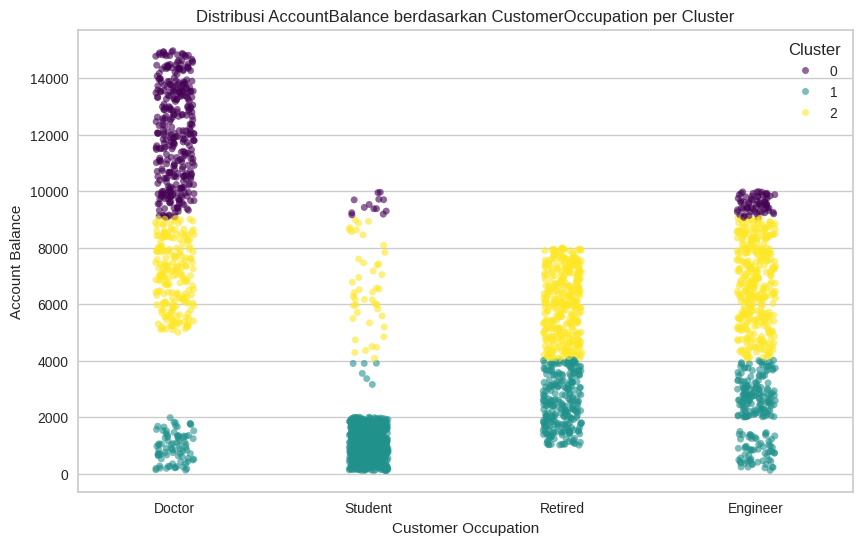

In [198]:
# Pastikan kolom CustomerOccupation sudah di-inverse
X_clust['CustomerOccupation'] = X_clust[['CustomerOccupation_Doctor', 'CustomerOccupation_Engineer',
                                         'CustomerOccupation_Retired', 'CustomerOccupation_Student']].idxmax(axis=1).str.replace('CustomerOccupation_', '')

# Strip Plot: AccountBalance vs CustomerOccupation, dengan warna berdasarkan Cluster
plt.figure(figsize=(10, 6))
sns.stripplot(x='CustomerOccupation', y='AccountBalance', hue='Cluster', data=X_clust,
              palette='viridis', jitter=True, alpha=0.6)
plt.title('Distribusi AccountBalance berdasarkan CustomerOccupation per Cluster')
plt.xlabel('Customer Occupation')
plt.ylabel('Account Balance')
plt.legend(title='Cluster')
plt.show()

In [199]:
X_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Location                     2512 non-null   float64
 1   TransactionType_Credit       2512 non-null   bool   
 2   TransactionType_Debit        2512 non-null   bool   
 3   Channel_ATM                  2512 non-null   bool   
 4   Channel_Branch               2512 non-null   bool   
 5   Channel_Online               2512 non-null   bool   
 6   CustomerOccupation_Doctor    2512 non-null   bool   
 7   CustomerOccupation_Engineer  2512 non-null   bool   
 8   CustomerOccupation_Retired   2512 non-null   bool   
 9   CustomerOccupation_Student   2512 non-null   bool   
 10  TransactionAmount            2512 non-null   float64
 11  CustomerAge                  2512 non-null   int64  
 12  TransactionDuration          2512 non-null   int64  
 13  LoginAttempts     

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [200]:
# CustomerOccupation sudah di-inverse
X_clust['CustomerOccupation'] = X_clust[['CustomerOccupation_Doctor', 'CustomerOccupation_Engineer',
                                         'CustomerOccupation_Retired', 'CustomerOccupation_Student']].idxmax(axis=1).str.replace('CustomerOccupation_', '')

# TransactionType sudah di-inverse
X_clust['TransactionType'] = X_clust[['TransactionType_Credit', 'TransactionType_Debit']].idxmax(axis=1).str.replace('TransactionType_', '')

# Channel sudah di-inverse
X_clust['Channel'] = X_clust[['Channel_ATM', 'Channel_Branch', 'Channel_Online']].idxmax(axis=1).str.replace('Channel_', '')


<ipython-input-200-f2fb7723b531>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clust['CustomerOccupation'] = X_clust[['CustomerOccupation_Doctor', 'CustomerOccupation_Engineer',
<ipython-input-200-f2fb7723b531>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clust['TransactionType'] = X_clust[['TransactionType_Credit', 'TransactionType_Debit']].idxmax(axis=1).str.replace('TransactionType_', '')
<ipython-input-200-f2fb7723b531>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [201]:
columns_to_drop = [
    'TransactionType_Credit',
    'TransactionType_Debit',
    'CustomerOccupation_Doctor',
    'CustomerOccupation_Engineer',
    'CustomerOccupation_Retired',
    'CustomerOccupation_Student',
    'Channel_ATM', 'Channel_Branch', 'Channel_Online'
]
X_clust = X_clust.drop(labels=columns_to_drop, axis=1)

In [202]:
location_mapping = dict(location_freq)  # Simpan mapping

# Step 2: Buat Inverse Mapping (Balik Key-Value)
inverse_location_mapping = {v: k for k, v in location_mapping.items()}

# Step 3: Kembalikan Data ke Nama Asli
X_clust['Location_Inverse'] = X_clust['Location'].map(inverse_location_mapping)

# Step 4: Cek Hasilnya
print(X_clust[['Location', 'Location_Inverse']].head())

   Location Location_Inverse
0  0.023487           Austin
1  0.025080          Houston
2  0.024283          Atlanta
3  0.023487           Austin
4  0.024283          Atlanta


In [203]:
X_clust.head(10)

,Location,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster,CustomerOccupation,TransactionType,Channel,Location_Inverse
0,0.023487,2.714032,70,81,1.0,5112.21,2,Doctor,Debit,ATM,Austin
1,0.025080,5.932882,68,141,1.0,13758.91,0,Doctor,Debit,ATM,Houston
2,0.024283,4.846468,19,56,1.0,1122.35,1,Student,Debit,Online,Atlanta
3,0.023487,5.223055,26,25,1.0,8569.06,2,Student,Debit,Online,Austin
4,0.024283,2.670694,26,198,1.0,7429.40,2,Student,Credit,Online,Atlanta
5,0.027070,4.534211,18,172,1.0,781.68,1,Student,Debit,ATM,Charlotte
6,0.024283,2.089392,37,139,1.0,13316.71,0,Doctor,Credit,ATM,Atlanta
7,0.023089,5.149933,67,291,1.0,2796.24,1,Retired,Credit,Branch,New York
8,0.025080,4.674976,51,86,1.0,9095.14,0,Engineer,Credit,Branch,Houston
9,0.021895,6.705590,55,120,1.0,1021.88,1,Doctor,Debit,ATM,Milwaukee


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [204]:
# saya tidak melakukan StandardScaler atau MinMaxScaler karena sudah melakukan tranform log(1)

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [205]:
# Rata-rata fitur numerik per cluster
numeric_features = ['AccountBalance', 'TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
numeric_analysis = X_clust.groupby('Cluster')[numeric_features].mean()
print("Rata-rata Fitur Numerik per Cluster:")
print(numeric_analysis)

Rata-rata Fitur Numerik per Cluster:
         AccountBalance  TransactionAmount  CustomerAge  TransactionDuration  \
Cluster                                                                        
0          11596.903967           5.143590    47.498812           123.194774   
1           1575.927866           5.176983    37.885017           119.601045   
2           6527.748982           5.105182    51.677625           118.109226   

         LoginAttempts  
Cluster                 
0             1.057492  
1             1.040300  
2             1.037076  


In [206]:
# Distribusi fitur kategorikal per cluster
categorical_features = ['CustomerOccupation', 'TransactionType']
for feature in categorical_features:
    if feature not in X_clust.columns:
        # Inverse transform untuk TransactionType
        X_clust['TransactionType'] = X_clust[['TransactionType_Credit', 'TransactionType_Debit']].idxmax(axis=1).str.replace('TransactionType_', '')
    print(f"\nDistribusi {feature} per Cluster:")
    print(X_clust.groupby('Cluster')[feature].value_counts(normalize=True) * 100)


Distribusi CustomerOccupation per Cluster:
Cluster  CustomerOccupation
0        Doctor                81.235154
         Engineer              15.676960
         Student                3.087886
1        Student               52.264808
         Retired               22.212544
         Engineer              18.379791
         Doctor                 7.142857
2        Engineer              36.903499
         Retired               36.479321
         Doctor                21.951220
         Student                4.665960
Name: proportion, dtype: float64

Distribusi TransactionType per Cluster:
Cluster  TransactionType
0        Debit              76.009501
         Credit             23.990499
1        Debit              77.526132
         Credit             22.473868
2        Debit              77.836691
         Credit             22.163309
Name: proportion, dtype: float64


# Hasil interpretasinya dari Distribusi AccountBalance berdasarkan CustomerOccupation per Cluster

1. Cluster 0:
* Rata-rata AccountBalance: 11,596.90
* Distribusi CustomerOccupation: Didominasi oleh "Doctor" dengan saldo akun tinggi (10,000–14,000), serta sedikit "Retired" dan "Engineer".
* Analisis: Cluster ini terdiri dari pelanggan dengan saldo akun yang sangat tinggi, terutama dari profesi dokter. Mereka cenderung memiliki stabilitas finansial yang kuat, yang konsisten dengan pendapatan tinggi yang sering dikaitkan dengan profesi dokter. Keberadaan beberapa pensiunan dan insinyur menunjukkan bahwa cluster ini juga mencakup individu dari profesi lain dengan kapasitas finansial yang baik.
2. Cluster 1:
* Rata-rata AccountBalance: 1,575.93
* Distribusi CustomerOccupation: Didominasi oleh "Student" dengan saldo akun rendah (0–2,000), serta sedikit "Doctor" dan "Engineer".
* Analisis: Cluster ini mencakup pelanggan dengan saldo akun yang sangat rendah, mayoritas adalah mahasiswa. Hal ini mencerminkan keterbatasan finansial yang umum dialami mahasiswa, yang mungkin bergantung pada dukungan keluarga atau pendapatan terbatas. Keberadaan beberapa dokter dan insinyur dengan saldo rendah mungkin menunjukkan individu pada tahap awal karier mereka.
3. Cluster 2:
Cluster 2:
* Rata-rata AccountBalance: 6,527.75
* Distribusi CustomerOccupation: Didominasi oleh "Retired" dan "Engineer" dengan saldo akun sedang (4,000–8,000), serta sedikit "Doctor".
* Analisis: Cluster ini terdiri dari pelanggan dengan saldo akun sedang, terutama dari profesi pensiunan dan insinyur. Saldo akun yang moderat mencerminkan stabilitas finansial yang cukup baik, mungkin dari tabungan pensiun atau pendapatan tetap insinyur. Keberadaan beberapa dokter dengan saldo lebih tinggi menunjukkan adanya variasi dalam kapasitas finansial di antara profesi ini.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [207]:
X_clust.to_csv("data_clustering.csv", index=False)

print("File CSV berhasil disimpan sebagai 'data_clustering.csv'")

File CSV berhasil disimpan sebagai 'data_clustering.csv'
